In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
iris_classification=pd.read_csv(r"C:\Users\TUFF\Downloads\archive (1)\IRIS.csv")

In [57]:
iris_classification.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_classification.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
iris_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
#to display no.of samples on each class
iris_classification['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [61]:
#checking for null values
iris_classification.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

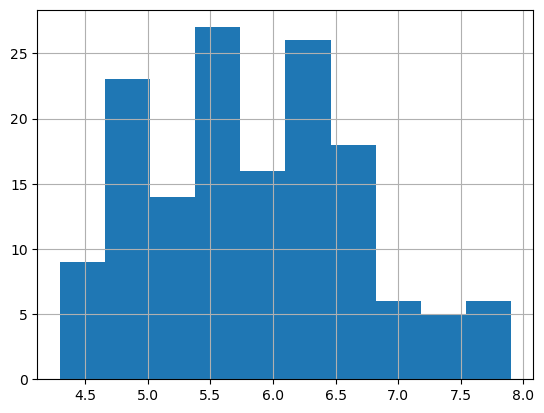

In [62]:
iris_classification['sepal_length'].hist()

<Axes: >

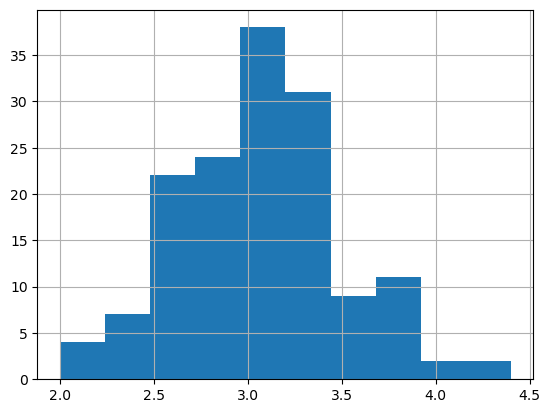

In [63]:
iris_classification['sepal_width'].hist()

<Axes: >

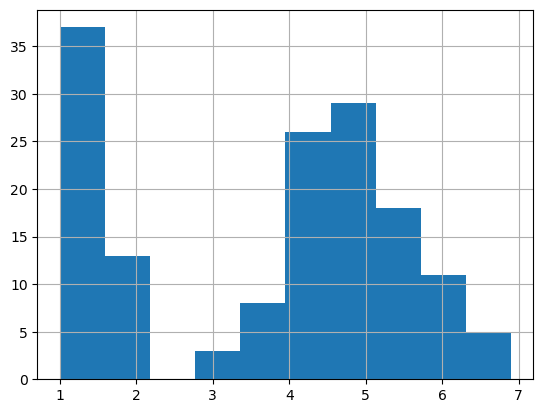

In [64]:
iris_classification['petal_length'].hist()

<Axes: >

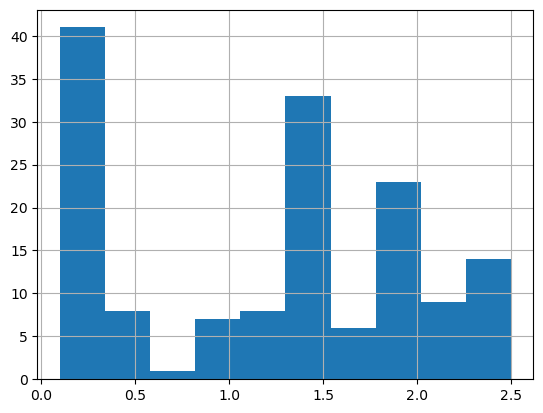

In [65]:
iris_classification['petal_width'].hist()

In [66]:
#Scatterplot
colors=['red','orange','blue']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']

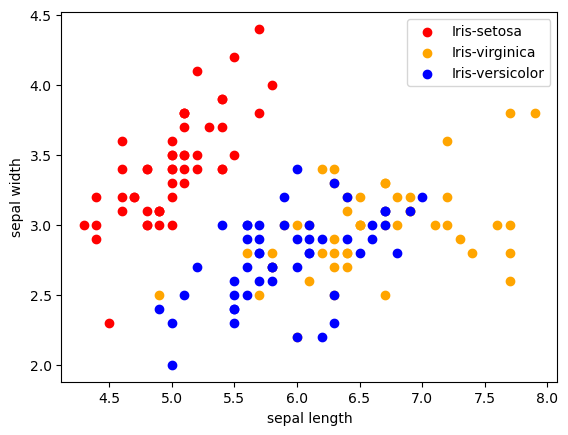

In [67]:
for i in range(3):
    x=iris_classification[iris_classification['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c=colors[i],label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()

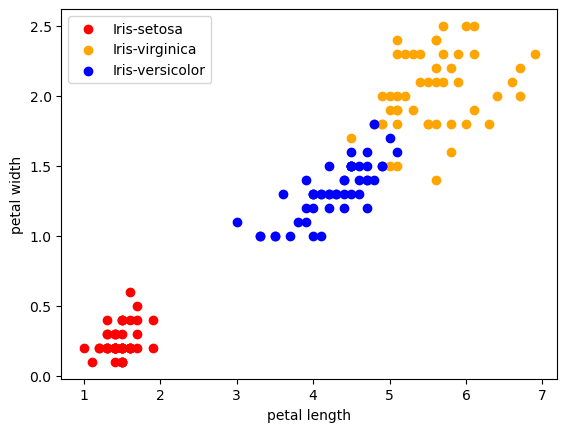

In [68]:
for i in range(3):
    x=iris_classification[iris_classification['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c=colors[i],label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()

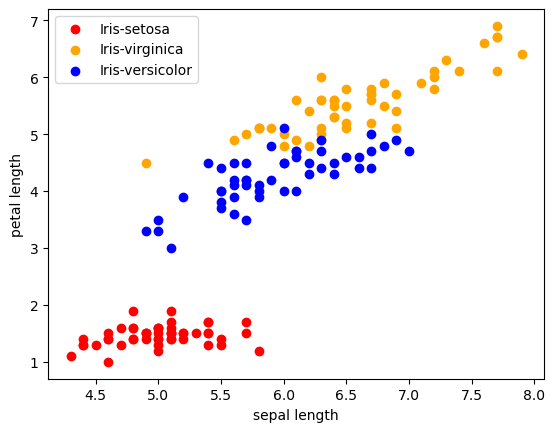

In [69]:
for i in range(3):
    x=iris_classification[iris_classification['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c=colors[i],label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.legend()

In [70]:
iris_classification.corr()

C:\Users\TUFF\AppData\Local\Temp\ipykernel_30536\3154841429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_classification.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\TUFF\AppData\Local\Temp\ipykernel_30536\1752867464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_classification.corr()


<Axes: >

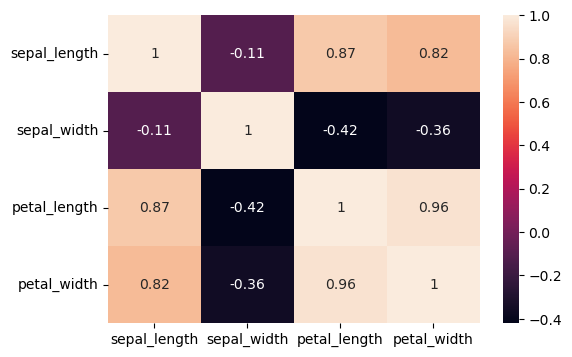

In [71]:
corr=iris_classification.corr()
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, annot=True, ax=ax)

In [72]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
iris_classification['species']= le.fit_transform(iris_classification['species'])
iris_classification.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINING

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x=iris_classification.drop(columns=['species'])
y=iris_classification['species']
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30)

LOGISTIC REGRESSION

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model=LogisticRegression()

In [78]:
model.fit(x_train,y_train)

C:\Users\TUFF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
print("Accuracy:", model.score(x_train, y_train))

Accuracy: 0.9714285714285714


In [80]:
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9555555555555556


KNN - CLASSIFIER

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model=KNeighborsClassifier()

In [83]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
print("Accuracy:", model.score(x_train, y_train))

Accuracy: 0.9809523809523809


In [85]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9777777777777777


In [86]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [87]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
print("Accuracy:", model.score(x_train, y_train))

Accuracy: 1.0


In [89]:
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.9333333333333333


KNN IS GIVING THE BEST ACCURACY SO WE CAN CONSIDER IT FOR IRIS FLOWER CLASSIFICATION